<a href="https://colab.research.google.com/github/337ubaid/AnalisisDataDicoding/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Muhammad Ubaidillah
- **Email:** devvevan@student.ub.ac.id
- **ID Dicoding:** beyubey

## Menentukan Pertanyaan Bisnis

- Kapan rental mendapatkan penyewa terbanyak ? (berdasarkan bulan, hari(0-6), jam)
- Apa pengaruh dari cuaca dan musim terhadap penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [844]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### Gathering Data

In [845]:
logdayraw_df = pd.read_csv('data/day.csv')
logdayraw_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [846]:
loghourraw_df = pd.read_csv('data/hour.csv')
loghourraw_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14812,14813,2012-09-14,3,1,9,9,0,5,1,2,0.62,0.5909,0.78,0.1642,46,301,347
12732,12733,2012-06-19,2,1,6,17,0,2,1,1,0.80,0.7576,0.55,0.1940,86,725,811
9712,9713,2012-02-14,1,1,2,15,0,2,1,2,0.42,0.4242,0.38,0.4478,7,138,145
619,620,2011-01-29,1,0,1,1,0,6,0,1,0.22,0.2273,0.64,0.1940,0,20,20
10282,10283,2012-03-09,1,1,3,12,0,5,1,1,0.36,0.3333,0.34,0.4179,27,174,201


### Assessing Data

#### Menilai `logday_df`

In [847]:
logdayraw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [848]:
print(logdayraw_df.isnull().sum())
print(logdayraw_df.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [849]:
print("Jumlah duplikasi: ", logdayraw_df.duplicated().sum())

Jumlah duplikasi:  0


In [850]:
logdayraw_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai `loghour_df`

In [851]:
loghourraw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [852]:
print(loghourraw_df.isnull().sum())
print(loghourraw_df.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [853]:
print("Jumlah duplikasi: ",loghourraw_df.duplicated().sum())

Jumlah duplikasi:  0


In [854]:
loghourraw_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Data sudah bersih karena tidak ada duplikasi data, missing value, inaccurate value, dan kesalahan tipe data. 

In [855]:
# mengubah format ke datetime
logdayraw_df['dteday'] = pd.to_datetime(logdayraw_df['dteday'])
loghourraw_df['dteday'] = pd.to_datetime(loghourraw_df['dteday'])

In [856]:
"""
Membuat dictionary untuk memudahkan membaca data
"""
seasons = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
year = {0: 2011, 1: 2012}
months = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
days = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
weather_condition = {1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'}


In [857]:
""" 
Mengubah beberapa variabel untuk memudahkan membaca data
"""
logdayraw_df.rename(columns={
    'instant': 'rec_id',
    'dteday': 'datetime',
    'yr': 'year',
    'mnth': 'month',
    'holiday': 'is_holiday',
    'workingday': 'is_workingday',
    'weathersit': 'weather_condition',
    'hum': 'humidity',
    'cnt': 'total_count',
}, inplace=True)
loghourraw_df.rename(columns={
    'instant': 'rec_id',
    'dteday': 'datetime',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'holiday': 'is_holiday',
    'workingday': 'is_workingday',
    'weathersit': 'weather_condition',
    'hum': 'humidity',
    'cnt': 'total_count',
}, inplace=True)


In [858]:
loghour_df = loghourraw_df.copy()
loghour_df['season'] = loghour_df['season'].map(seasons)
loghour_df['year'] = loghour_df['year'].map(year)
loghour_df['month'] = loghour_df['month'].map(months)
loghour_df['weekday'] = loghour_df['weekday'].map(days)
loghour_df['weather_condition'] = loghour_df['weather_condition'].map(weather_condition)
loghour_df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,January,3,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,January,4,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [859]:
logday_df = logdayraw_df.copy()
logday_df['season'] = logday_df['season'].map(seasons)
logday_df['year'] = logday_df['year'].map(year)
logday_df['month'] = logday_df['month'].map(months)
logday_df['weekday'] = logday_df['weekday'].map(days)
logday_df['weather_condition'] = logday_df['weather_condition'].map(weather_condition)
logday_df.head()

,rec_id,datetime,season,year,month,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,Winter,2011,January,0,Saturday,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,2011,January,0,Sunday,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,2011,January,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Winter,2011,January,0,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Winter,2011,January,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Exploratory Data Analysis (EDA)

### Explore ...

In [860]:
loghour_df.sample(5)

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
15137,15138,2012-09-27,Fall,2012,September,22,0,Thursday,1,Light Snow,0.62,0.5758,0.83,0.2985,2,45,47
8569,8570,2011-12-28,Winter,2011,December,20,0,Wednesday,1,Clear,0.24,0.2273,0.41,0.2239,9,70,79
6036,6037,2011-09-14,Summer,2011,September,2,0,Wednesday,1,Clear,0.60,0.5606,0.83,0.0000,1,4,5
7580,7581,2011-11-17,Fall,2011,November,11,0,Thursday,1,Light Snow,0.32,0.3030,0.66,0.3284,4,93,97
10879,10880,2012-04-03,Spring,2012,April,11,0,Tuesday,1,Clear,0.48,0.4697,0.23,0.0000,91,167,258


In [861]:
loghour_df.groupby(by='weekday').is_workingday.value_counts().unstack()

is_workingday,0,1
weekday,,
Friday,48.0,2439.0
Monday,357.0,2122.0
Saturday,2512.0,NaN
Sunday,2502.0,NaN
Thursday,48.0,2423.0
Tuesday,23.0,2430.0
Wednesday,24.0,2451.0


In [862]:
logday_df

,rec_id,datetime,season,year,month,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,Winter,2011,January,0,Saturday,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,2011,January,0,Sunday,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,2011,January,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Winter,2011,January,0,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Winter,2011,January,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Winter,2012,December,0,Thursday,1,Mist,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,Winter,2012,December,0,Friday,1,Mist,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,Winter,2012,December,0,Saturday,0,Mist,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,Winter,2012,December,0,Sunday,0,Clear,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [863]:
logday_df.groupby('weekday').agg({
    'total_count': ['min','max','sum'],
}).sort_values(by=('total_count', 'sum'), ascending=False)


total_count              
                  min   max     sum
weekday                            
Friday           1167  8362  487790
Thursday          431  7804  485395
Saturday          627  8714  477807
Wednesday         441  8173  473048
Tuesday           683  7767  469109
Monday             22  7525  455503
Sunday            605  8227  444027

In [864]:
# mengambil jam ke berapa total_count tertinggi di tiap harinya
top_hour = loghour_df.groupby('weekday')['total_count'].idxmax().apply(lambda x: loghour_df.loc[x, 'hour'])
top_hour

weekday
Friday       17
Monday       18
Saturday     16
Sunday       12
Thursday     17
Tuesday      17
Wednesday    18
Name: total_count, dtype: int64

tiap harinya penyewaan tertinggi antara jam 12-18

In [865]:
# orders_customers_df["age_group"] = orders_customers_df.age.apply(lambda x: "Youth" if x <= 24 else ("Seniors" if x > 64 else "Adults"))
loghour_df["hour_group"] = loghour_df.hour.apply(lambda x: "Morning" if 6 <= x <= 12 else ("Afternoon" if 13 <= x <= 18 else "Night"))
loghour_df["hour_group"].value_counts()

hour_group
Night        7916
Morning      5088
Afternoon    4375
Name: count, dtype: int64

In [866]:
yearly_progress = logday_df.groupby(by='year').total_count.sum()   
yearly_progress

year
2011    1243103
2012    2049576
Name: total_count, dtype: int64

In [882]:
monthly_progress_2011 = logdayraw_df[logdayraw_df['year'] == 0].groupby('month')['total_count'].sum()
monthly_progress_2011


month
1      38189
2      48215
3      64045
4      94870
5     135821
6     143512
7     141341
8     136691
9     127418
10    123511
11    102167
12     87323
Name: total_count, dtype: int64

In [881]:
monthly_progress_2012 = logdayraw_df[logdayraw_df['year'] == 1].groupby('month')['total_count'].sum()
monthly_progress_2012

month
1      96744
2     103137
3     164875
4     174224
5     195865
6     202830
7     203607
8     214503
9     218573
10    198841
11    152664
12    123713
Name: total_count, dtype: int64

In [869]:
corr_logdayraw = logdayraw_df.corr()
corr_logdayraw

,rec_id,datetime,season,year,month,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
rec_id,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
datetime,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
year,0.866025,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
month,0.496702,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
is_holiday,0.016145,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
is_workingday,-0.004337,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weather_condition,-0.021477,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494


In [870]:
corr_total_count = logdayraw_df.corr()['total_count']
corr_total_count.to_frame()

,total_count
rec_id,0.628830
datetime,0.628830
season,0.406100
year,0.566710
month,0.279977
is_holiday,-0.068348
weekday,0.067443
is_workingday,0.061156
weather_condition,-0.297391
temp,0.627494


In [871]:
corr_total_count.index

Index(['rec_id', 'datetime', 'season', 'year', 'month', 'is_holiday',
       'weekday', 'is_workingday', 'weather_condition', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'total_count'],
      dtype='object')

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Text(0.5, 1.0, 'Yearly Progress')

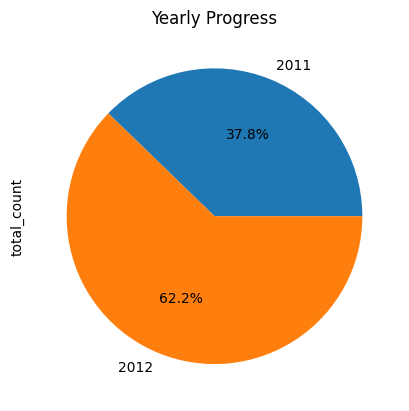

In [899]:
yearly_progress.plot(kind='pie', labels=yearly_progress.index, autopct='%1.1f%%')
plt.title('Yearly Progress')


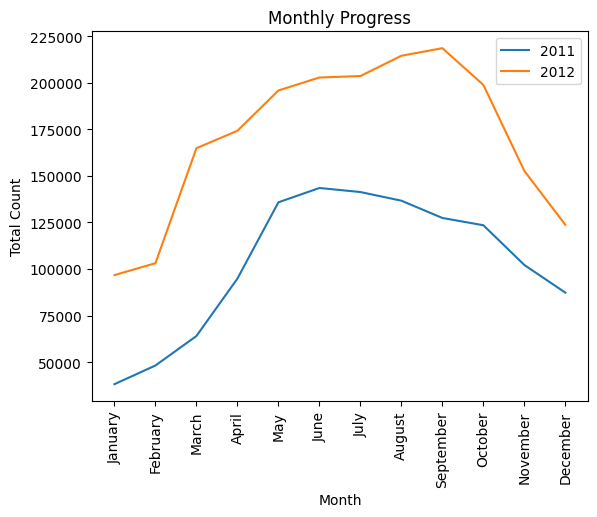

In [897]:
monthly_progress_2011.plot(kind='line', label='2011')
monthly_progress_2012.plot(kind='line', label='2012')

plt.title('Monthly Progress')

plt.xticks(monthly_progress_2011.index, monthly_progress_2011.index.map(months), rotation=90)
plt.xlabel('Month')
plt.ylabel('Total Count')

plt.legend()
plt.show()


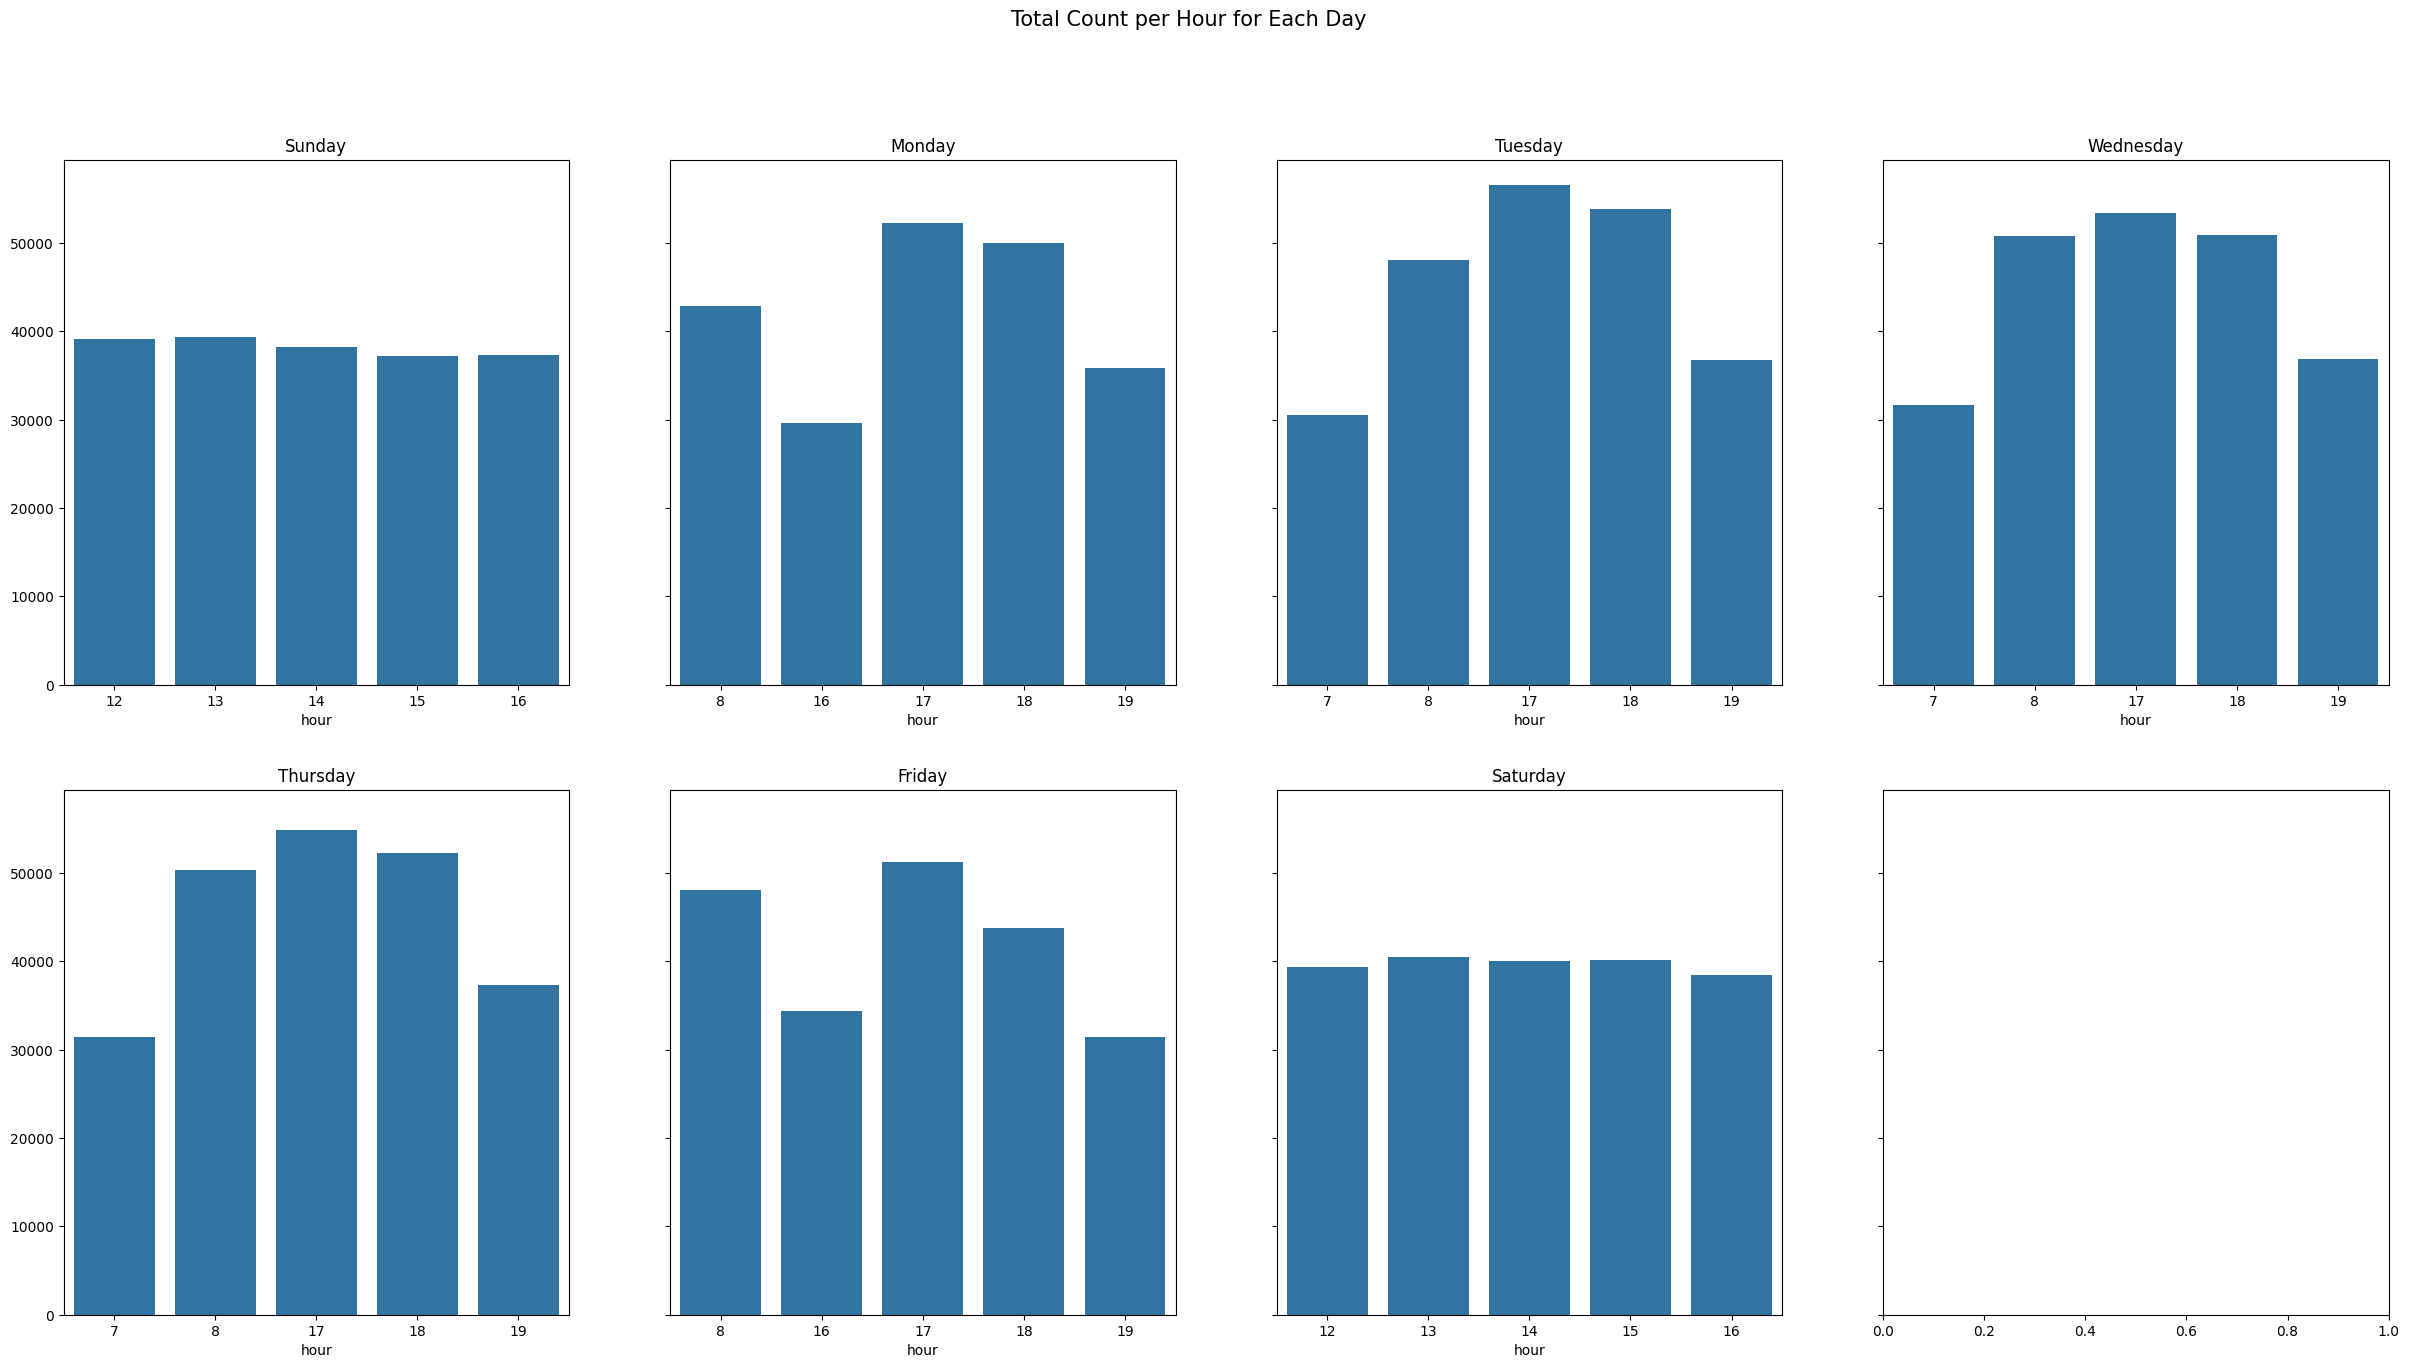

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(30, 15), sharey=True)

for i, day in enumerate(days.values()):
    logday = loghour_df[loghour_df['weekday'] == day]
    logday = logday.groupby('hour').total_count.sum().sort_values(ascending=False).head(5)
    logeachday_df = logday.to_frame()
    sns.barplot(x="hour", 
                y="total_count", 
                data=logeachday_df, 
                ax=ax[i//4][i%4]
                )
    ax[i//4][i%4].set_title(day)
    ax[i//4][i%4].set_ylabel('')  

plt.suptitle('Total Count per Hour for Each Day', fontsize=15)
plt.show()

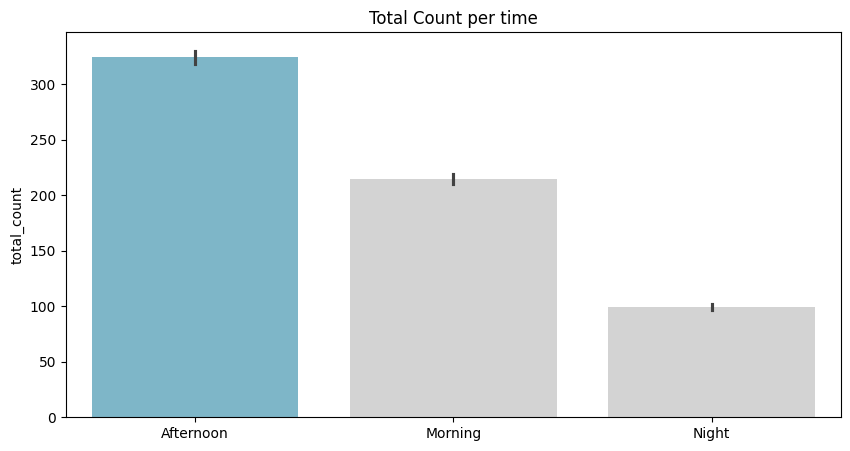

In [ ]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3"]
plt.figure(figsize=(10, 5))
sns.barplot(
    x='hour_group', 
    y='total_count',
    data=loghour_df.sort_values(by='total_count', ascending=False),
    palette=colors,
    hue='hour_group'
    )
plt.title('Total Count per time')
plt.xlabel('')
plt.show()

jumlah penyewaan terbanyak ada di waktu afternoon yaitu antara jam 1 siang hingga 6 sore

### Pertanyaan 2:

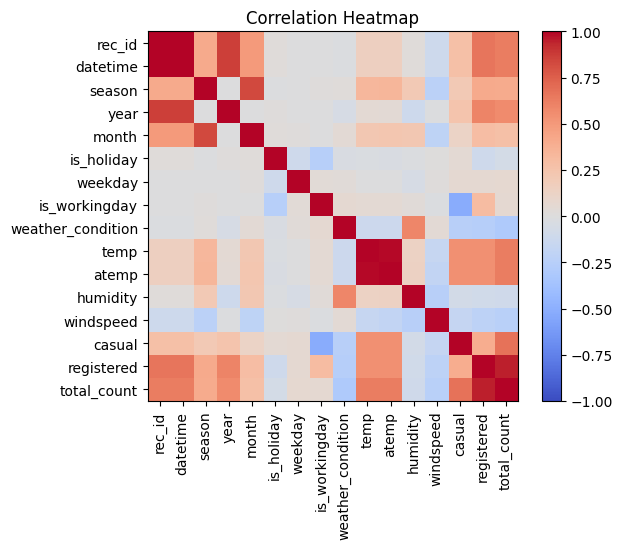

In [ ]:
plt.imshow(corr_logdayraw, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.title('Correlation Heatmap')
plt.xticks(range(len(corr_logdayraw.columns)), corr_logdayraw.columns, rotation=90)
plt.yticks(range(len(corr_logdayraw.columns)), corr_logdayraw.columns)
plt.show()


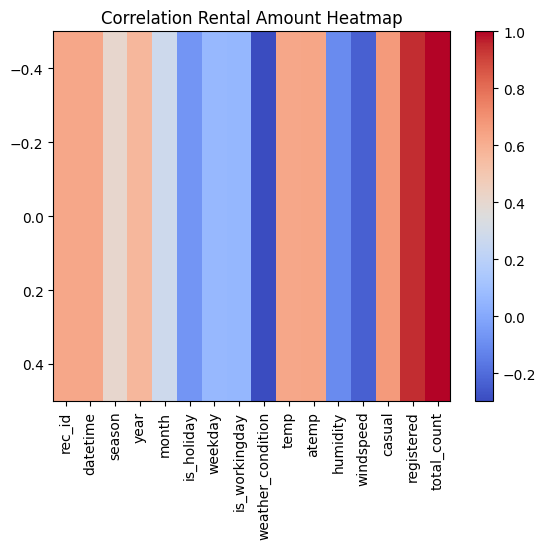

In [905]:
plt.imshow(corr_total_count.values.reshape(1, -1), cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.title('Correlation Rental Amount Heatmap')
plt.xticks(range(len(corr_total_count.index)), corr_total_count.index, rotation=90)
plt.show()

## Conclusion

- Jumlah penyewaan tiap tahunnya meningkat. Pola penyewaan tiap bulannya sama dari tahun 2011 hingga 2012. Dari Januari hingga tengah tahun menaik dan mulai menurun hingga desember. Waktu tinggi penyewaan adalah ketika siang-sore hari dari jam 1 siang hingga 6 sore. 
- Jumlah penyewaan akan tinggi sesuai dengan kecerahan cuaca. Jika cuaca cerah, kelembapan rendah, kecepatan angin rendah, dan suhu lingkungan tinggi maka akan semakin tinggi penyewaan. Sedangkan penyewaan akan menurun jika pada hari kerja.